📘 Polynomial Regression on Salary Prediction

💡 Problem Statement
We have a dataset of salaries based on different levels of positions. The goal is to predict salary using Polynomial Regression, clean the data by removing outliers, and visualize the results.

🛠️ 1. Importing Required Libraries


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn theme for better visuals
sns.set_theme(style="whitegrid")


📥 2. Load and Explore the Data


In [50]:
# Load the dataset
data = pd.read_csv("/Users/omgajipara/Desktop/Data Science/Supervised Learning/Regression/PolynomialRegression/polynomial.csv")

# Check for missing values
print("Missing values: \n", data.isnull().sum())

# Display dataset shape
print("\nDataset shape:", data.shape)

# Display head of the data
data.head()


Missing values: 
 Position    0
Level       0
Salary      0
dtype: int64

Dataset shape: (10, 3)


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


📊 3. Visualize Distributions & Detect Outliers


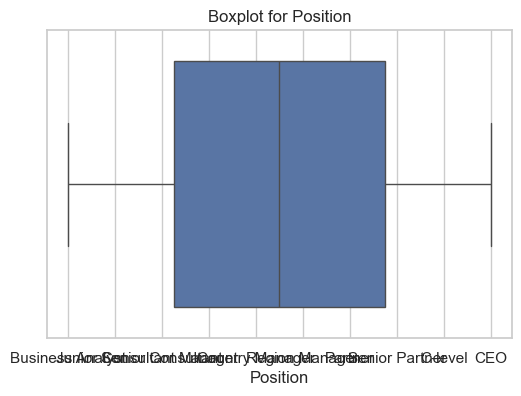

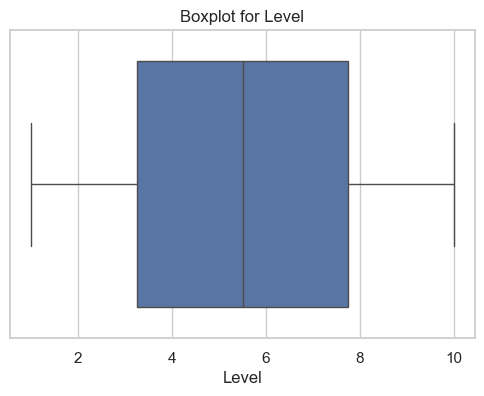

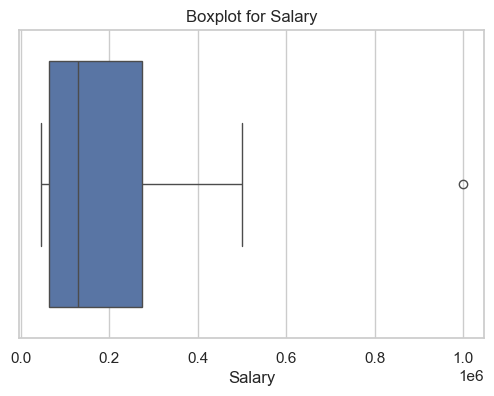

In [51]:
# Boxplot for each feature
for i in data.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[i])
    plt.title(f'Boxplot for {i}')
    plt.show()


🧹 4. Remove Outliers using IQR Method


In [52]:
# IQR for Salary
Q1 = data['Salary'].quantile(0.25)
Q3 = data['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data = data[(data['Salary'] >= lower_bound) & (data['Salary'] <= upper_bound)]

# New shape after removing outliers
print("New shape after outlier removal:", data.shape)


New shape after outlier removal: (9, 3)


📈 5. Scatter Plot of Level vs Salary


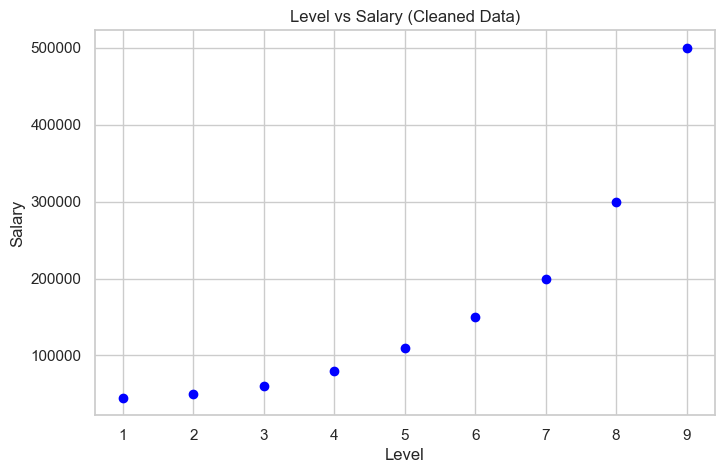

In [53]:
plt.figure(figsize=(8, 5))
plt.scatter(data['Level'], data['Salary'], color='blue')
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Level vs Salary (Cleaned Data)")
plt.grid(True)
plt.show()


🔁 6. Polynomial Feature Transformation


In [54]:
from sklearn.preprocessing import PolynomialFeatures

x = data[['Level']]  # Features
y = data['Salary']   # Target

# Transform features to polynomial degree 5
pf = PolynomialFeatures(degree=5)
x_poly = pf.fit_transform(x)


🔄 7. Train-Test Split and Model Training


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split data
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)

# Train model
lr = LinearRegression()
lr.fit(x_train, y_train)

# Evaluate model
accuracy = lr.score(x_test, y_test) * 100
print(f"Model Accuracy: {accuracy:.2f}%")


Model Accuracy: 99.81%


📊 8. Visualize the Polynomial Fit



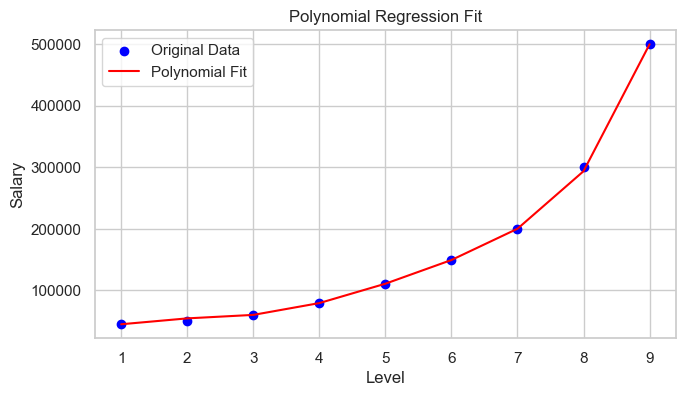

In [56]:
# Predict for all x
y_pred = lr.predict(x_poly)

plt.figure(figsize=(7.5,4))
plt.scatter(data['Level'], data['Salary'], label='Original Data', color='blue')
plt.plot(data['Level'], y_pred, color='red', label='Polynomial Fit')
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Polynomial Regression Fit")
plt.legend()
plt.grid(True)
plt.savefig("assets/PolynomialRegression.jpg")
plt.show()


🔍 9. Predicting Salary for New Example


In [57]:
example = pd.DataFrame([[6]], columns=["Level"])
predicted_salary = lr.predict(pf.transform(example))[0]
print(f"Predicted Salary for Level 6: ₹{predicted_salary:.2f}")



Predicted Salary for Level 6: ₹149382.24


In [58]:
lr.predict(pf.fit_transform([[6]]))


array([149382.23938226])